In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
%matplotlib inline

In [44]:
df = pd.read_csv('Summary of Weather.csv')
cdf = df.drop(df.columns[13:], axis=1)
cdf.drop(columns=['PoorWeather', 'WindGustSpd'], axis=1, inplace = True)
cdf.head()

C:\Users\saeid.habibi\AppData\Local\Temp\ipykernel_11488\3298325191.py:1: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Summary of Weather.csv')


,STA,Date,Precip,MaxTemp,MinTemp,MeanTemp,Snowfall,YR,MO,DA,PRCP
0,10001,1942-7-1,1.016,25.555556,22.222222,23.888889,0.0,42,7,1,0.04
1,10001,1942-7-2,0,28.888889,21.666667,25.555556,0.0,42,7,2,0
2,10001,1942-7-3,2.54,26.111111,22.222222,24.444444,0.0,42,7,3,0.1
3,10001,1942-7-4,2.54,26.666667,22.222222,24.444444,0.0,42,7,4,0.1
4,10001,1942-7-5,0,26.666667,21.666667,24.444444,0.0,42,7,5,0


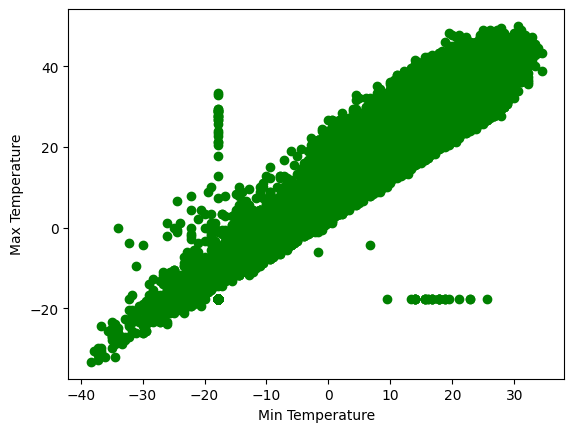

In [45]:
plt.scatter(cdf.MinTemp, cdf.MaxTemp, color='green')
plt.xlabel('Min Temperature')
plt.ylabel('Max Temperature')
plt.show()

In [46]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [47]:
x = np.asanyarray(cdf[['MinTemp']])
y = np.asanyarray(cdf[['MaxTemp']])

In [48]:
msk = np.random.rand(len(cdf)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [51]:
train_x = np.asanyarray(train[['MinTemp']])
train_y = np.asanyarray(train[['MaxTemp']])

test_x = np.asanyarray(test[['MinTemp']])
test_y = np.asanyarray(test[['MaxTemp']])

poly = PolynomialFeatures(2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[  1.        ,  22.22222222, 493.8271604 ],
       [  1.        ,  21.66666667, 469.44444459],
       [  1.        ,  22.22222222, 493.8271604 ],
       ...,
       [  1.        ,  18.33333333, 336.11111099],
       [  1.        ,  18.33333333, 336.11111099],
       [  1.        ,  17.22222222, 296.6049382 ]])

In [52]:
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)

print('Coefficients are ', clf.coef_)
print('Intercept is ', clf.intercept_)

Coefficients are  [[ 0.          1.11547032 -0.00998255]]
Intercept is  [11.06050576]


Text(0, 0.5, 'Emission')

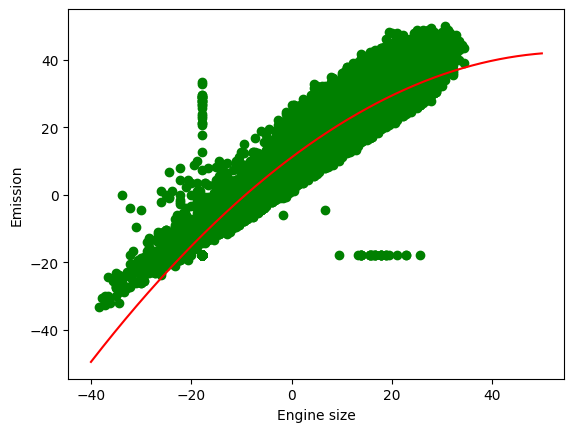

In [56]:
plt.scatter(cdf.MinTemp, cdf.MaxTemp, color='green')
xx = np.arange(-40, 50, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*xx+ clf.coef_[0][2]*np.power(xx, 2)
plt.plot(xx, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [57]:
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
test_y_hat = clf.predict(test_x_poly)

print('r2 score is: ', r2_score(test_y, test_y_hat))

r2 score is:  0.7970985988716387


In [58]:
regr = linear_model.LinearRegression()
regr.fit(train_x, train_y)
print('coefficient is: ', regr.coef_)
print('intercept is: ', regr.intercept_)

coefficient is:  [[0.91676836]]
intercept is:  [10.74423674]


Text(0, 0.5, 'Max Temperature')

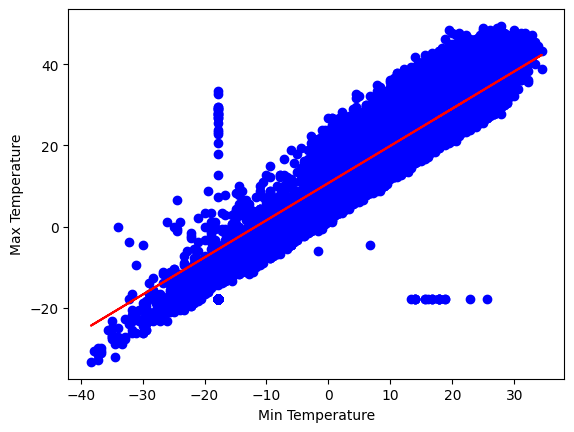

In [65]:
plt.scatter(train.MinTemp, train.MaxTemp,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Min Temperature")
plt.ylabel("Max Temperature")

In [61]:
test_y_ = regr.predict(test_x)

print('r2 score is: ', r2_score(test_y, test_y_))

r2 score is:  0.7788818625959182
